### 1. 개발

In [3]:
%%writefile ../src/EventTest.sol
pragma solidity >=0.5.0;

contract EventTest {
    event MyLog(string my);
    function myFunction() public {
        emit MyLog("Hello World!");
    }
}

Overwriting ../src/EventTest.sol


### 2. 컴파일

In [4]:
!solc --abi --bin --gas ../src/EventTest.sol


======= ../src/EventTest.sol:EventTest =======
Gas estimation:
construction:
   93 + 42600 = 42693
external:
   myFunction():	1748
Binary:
6080604052348015600f57600080fd5b5060d58061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063c3780a3a14602d575b600080fd5b60336035565b005b7f5186edd9beca61d795526ca1f274260b3fc74be3e10e1f02e1be1552e14f137360405180806020018281038252600c8152602001807f48656c6c6f20576f726c6421000000000000000000000000000000000000000081525060200191505060405180910390a156fea2646970667358221220096991976fa573005dabf68d3f5432146d7554635fb670d4ae2cff3c4d4c84f964736f6c63430006040033
Contract JSON ABI
[{"anonymous":false,"inputs":[{"indexed":false,"internalType":"string","name":"my","type":"string"}],"name":"MyLog","type":"event"},{"inputs":[],"name":"myFunction","outputs":[],"stateMutability":"nonpayable","type":"function"}]


### 3. 배포

In [5]:
%%writefile ../src/EventTestDeploy.js
var Web3 = require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
}

var _abi = [{"anonymous":false,"inputs":[{"indexed":false,"internalType":"string","name":"my","type":"string"}],"name":"MyLog","type":"event"},{"inputs":[],"name":"myFunction","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _bin = "0x"+"6080604052348015600f57600080fd5b5060d58061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063c3780a3a14602d575b600080fd5b60336035565b005b7f5186edd9beca61d795526ca1f274260b3fc74be3e10e1f02e1be1552e14f137360405180806020018281038252600c8152602001807f48656c6c6f20576f726c6421000000000000000000000000000000000000000081525060200191505060405180910390a156fea2646970667358221220096991976fa573005dabf68d3f5432146d7554635fb670d4ae2cff3c4d4c84f964736f6c63430006040033";

async function deploy() {
    const accounts = await web3.eth.getAccounts();
    console.log("Deploying the contract from "+accounts[0]);
    var deployed = await new web3.eth.Contract(_abi)
        .deploy({data:_bin})
        .send({from:accounts[0], gas:1000000}, function(err, transactionHash) {
            if (!err)
                console.log("hash: "+transactionHash);
        });
    console.log("The contract deployed to: "+deployed.options.address)
}
deploy()

Writing ../src/EventTestDeploy.js


In [6]:
!node ../src/EventTestDeploy.js

Deploying the contract from 0xbEa640f824777De07099b5FA38E85090b8841262
hash: 0x6614ef72e764e834b3fa7dce943c8e0f4b466c22ffe19e75d2ed7ff1a79c49cd
The contract deployed to: 0x2020D42A3e0706f1d3B5901458424e266b81114C


### 4. 사용

In [9]:
%%writefile ../src/EventTestHttpNoEventFiredUse.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));

var _abi = [{"anonymous":false,"inputs":[{"indexed":false,"internalType":"string","name":"my","type":"string"}],"name":"MyLog","type":"event"},{"inputs":[],"name":"myFunction","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _contract = new web3.eth.Contract(_abi, "0x2020D42A3e0706f1d3B5901458424e266b81114C");

var event = _contract.events.MyLog({fromBlock:0}, function (err, ret) {
    if (!err)
        console.log("Event Fired: "+JSON.stringify(ret.returnValues));
});

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account: "+accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance Before: "+balanceBefore);
    const value = await _contract.methods.myFunction()
        .send({from:accounts[0], gas:1000000})
    console.log("myFunction called "+JSON.stringify(value.events.MyLog.returnValues));
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance After: "+balanceAfter);
    console.log("Balance diff: "+(balanceBefore - balanceAfter));
}
doIt()

Overwriting ../src/EventTestHttpNoEventFiredUse.js


In [10]:
!node ../src/EventTestHttpNoEventFiredUse.js

Account: 0xbEa640f824777De07099b5FA38E85090b8841262
Balance Before: 99990454760000000000
myFunction called {"0":"Hello World!","my":"Hello World!"}
Balance After: 99989998520000000000
Balance diff: 456239999991808


### Websocket 사용

In [12]:
%%writefile ../src/EventTestWsUse.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.WebsocketProvider("http://localhost:8345"));

var _abi = [{"anonymous":false,"inputs":[{"indexed":false,"internalType":"string","name":"my","type":"string"}],"name":"MyLog","type":"event"},{"inputs":[],"name":"myFunction","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _contract = new web3.eth.Contract(_abi, "0x2020D42A3e0706f1d3B5901458424e266b81114C");

var event = _contract.events.MyLog({fromBlock:0}, function (err, ret) {
    if (!err)
        console.log("Event Fired: "+JSON.stringify(ret.returnValues));
});

async function doIt() {
    const accounts = await web3.eth.getAccounts();
    console.log("Account: "+accounts[0]);
    const balanceBefore = await web3.eth.getBalance(accounts[0]);
    console.log("Balance Before: "+balanceBefore);
    const value = await _contract.methods.myFunction()
        .send({from:accounts[0], gas:1000000})
    console.log("myFunction called "+JSON.stringify(value.events.MyLog.returnValues));
    const balanceAfter = await web3.eth.getBalance(accounts[0]);
    console.log("Balance After: "+balanceAfter);
    console.log("Balance diff: "+(balanceBefore - balanceAfter));
}
doIt()

Writing ../src/EventTestWsUse.js


In [1]:
!node ../src/EventTestWsUse.js

^C


event가 hanging 상태로 유지되어 `*`로 표시 -> kernel restart 해야 함

In [2]:
from IPython.display import Image

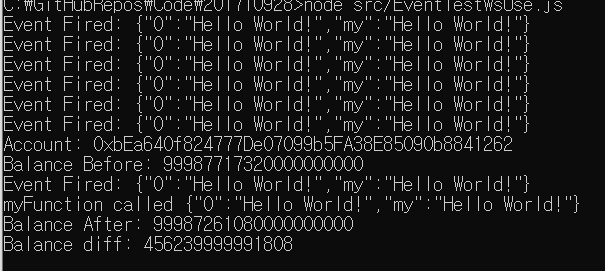

In [3]:
Image("event.PNG")